#**Name :** Pawan Gosavi
#**Class :** FY MSc IT Part I
#**Roll No. :** 01

# **BDA - Practical No. 05**

## **P5.1**

## **Aim :** Implement Classification techniques.

### Numerical computing libraries

In [1]:
# Numerical computing libraries

# !pip install pandas
# !pip install numpy
# !pip install matplotlib
# !pip install seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

### Source Data

Download Data From : https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/rpart/kyphosis.csv

Create one Filder Called "python" in Your Google Drive & Save the CSV File in that Folder.

Mount Your Google Drive & Copy Path of Your File.

In [2]:
#from google.colab import drive
#drive.mount("/content/drive")

### Loading Data

In [3]:
# raw_data = pd.read_csv('kyphosis.csv')
# raw_data.columns

raw_data = pd.read_csv('/content/drive/MyDrive/python/kyphosis.csv')

In [4]:
# Verifying File

raw_data.columns

Index(['Unnamed: 0', 'Kyphosis', 'Age', 'Number', 'Start'], dtype='object')

### Exploratory data analysis

In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  81 non-null     int64 
 1   Kyphosis    81 non-null     object
 2   Age         81 non-null     int64 
 3   Number      81 non-null     int64 
 4   Start       81 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 3.3+ KB


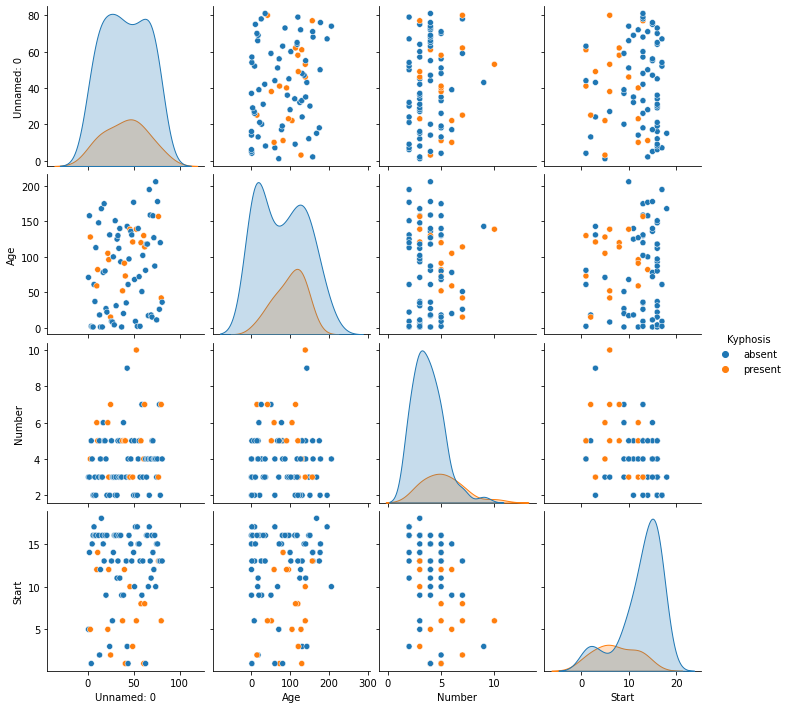

In [6]:
sns.pairplot(raw_data, hue = 'Kyphosis')

### Split the data set into training data and test data

In [7]:
x = raw_data.drop('Kyphosis', axis = 1)
y = raw_data['Kyphosis']
x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(x, y, test_size = 0.3)

### Train the decision tree model

In [8]:
model = DecisionTreeClassifier()
model.fit(x_training_data, y_training_data)
predictions = model.predict(x_test_data)

### Measure the performance of the decision tree model

In [9]:
print("\nClassification Report\n")
print(classification_report(y_test_data, predictions))


Classification Report

              precision    recall  f1-score   support

      absent       0.88      0.65      0.75        23
     present       0.00      0.00      0.00         2

    accuracy                           0.60        25
   macro avg       0.44      0.33      0.38        25
weighted avg       0.81      0.60      0.69        25



In [10]:
cm = confusion_matrix(y_test_data, predictions)

print("\nConfusion Matrix\n")
print("TP\t", cm[0][0], "\tFP\t", cm[0][1], "\n")
print("FN\t", cm[1][0], "\tTN\t", cm[1][1])


Confusion Matrix

TP	 15 	FP	 8 

FN	 2 	TN	 0


## **P5.2**

## **Aim :** Implement SVM classification techniques.

### Importing Important Libraries

In [11]:
#Import scikit-learn dataset library
from sklearn import datasets

# Import train_test_split function
from sklearn.model_selection import train_test_split

#Import svm model
from sklearn import svm

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

### Loading Data

In [12]:
#Load dataset
cancer = datasets.load_breast_cancer()

### Exploring Data

In [13]:
# print the names of the 13 features
print("Features: ", cancer.feature_names)

Features:  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [14]:
# print the label type of cancer('malignant' 'benign')
print("Labels: ", cancer.target_names)

Labels:  ['malignant' 'benign']


In [15]:
# print data(feature)shape
cancer.data.shape

(569, 30)

In [16]:
# print the cancer data features (top 5 records)
print(cancer.data[0:5])

[[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
  7.017e-02 1.812e-01 5.667e-02 5.435e-01 7.339e-01 3.398e+00 7.408e+01
  5.225e-03 1.308e-02 1.860e-02 1.340e-02 1.389e-02 3.532e-03 2.499e+01
  2.341e+01 1.588e+02 1.956e+03 1.238e-01 1.866e-01 2.416e-01 1.860e-01
  2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 1.203e+03 1.096e-01 1.599e-01 1.974e-01
  1.279e-01 2.069e-01 5.999e-02 7.456e-01 7.869e-01 4.585e+00 9.403e+01
  6.150e-03 4.006e-02 3.832e-02 2.058e-02 2.250e-02 4.571e-03 2.357e+01
  2.553e+01 1.525e+02 1.709e+03 1.444e-01 4.245e-01 4.504e-01 2.430e-01
  3.613e-01 8.758e-02]
 [1.142e+01 2.038e+01 7.758e+01 3.861e+02 1.425e-01 2.839e-01 2.414

In [17]:
# print the cancer labels (0:malignant, 1:benign)
print(cancer.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

### Splitting Data

In [18]:
# Split dataset into training set and test set
# 70% training and 30% test

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.3,random_state=109)

### Generating Model

In [19]:
#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

In [20]:
#Train the model using the training sets
clf.fit(X_train, y_train)

SVC(kernel='linear')

In [21]:
#Predict the response for test dataset
y_pred = clf.predict(X_test)

### Evaluating the Model

In [22]:
# Model Accuracy: how often is the classifier correct?
print("SVM Model Accuracy : ", metrics.accuracy_score(y_test, y_pred))

SVM Model Accuracy :  0.9649122807017544


In [23]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision : ", metrics.precision_score(y_test, y_pred))

Precision :  0.9811320754716981


In [24]:
# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall : ",metrics.recall_score(y_test, y_pred))

Recall :  0.9629629629629629


In [25]:
print("\nClassification Report\n")
print(metrics.classification_report(y_test, y_pred))


Classification Report

              precision    recall  f1-score   support

           0       0.94      0.97      0.95        63
           1       0.98      0.96      0.97       108

    accuracy                           0.96       171
   macro avg       0.96      0.97      0.96       171
weighted avg       0.97      0.96      0.97       171



In [26]:
cm = confusion_matrix(y_test, y_pred)

print("\nConfusion Matrix\n")
print("TP\t", cm[0][0], "\tFP\t", cm[0][1], "\n")
print("FN\t", cm[1][0], "\tTN\t", cm[1][1])


Confusion Matrix

TP	 61 	FP	 2 

FN	 4 	TN	 104
